Loading models and metrics...


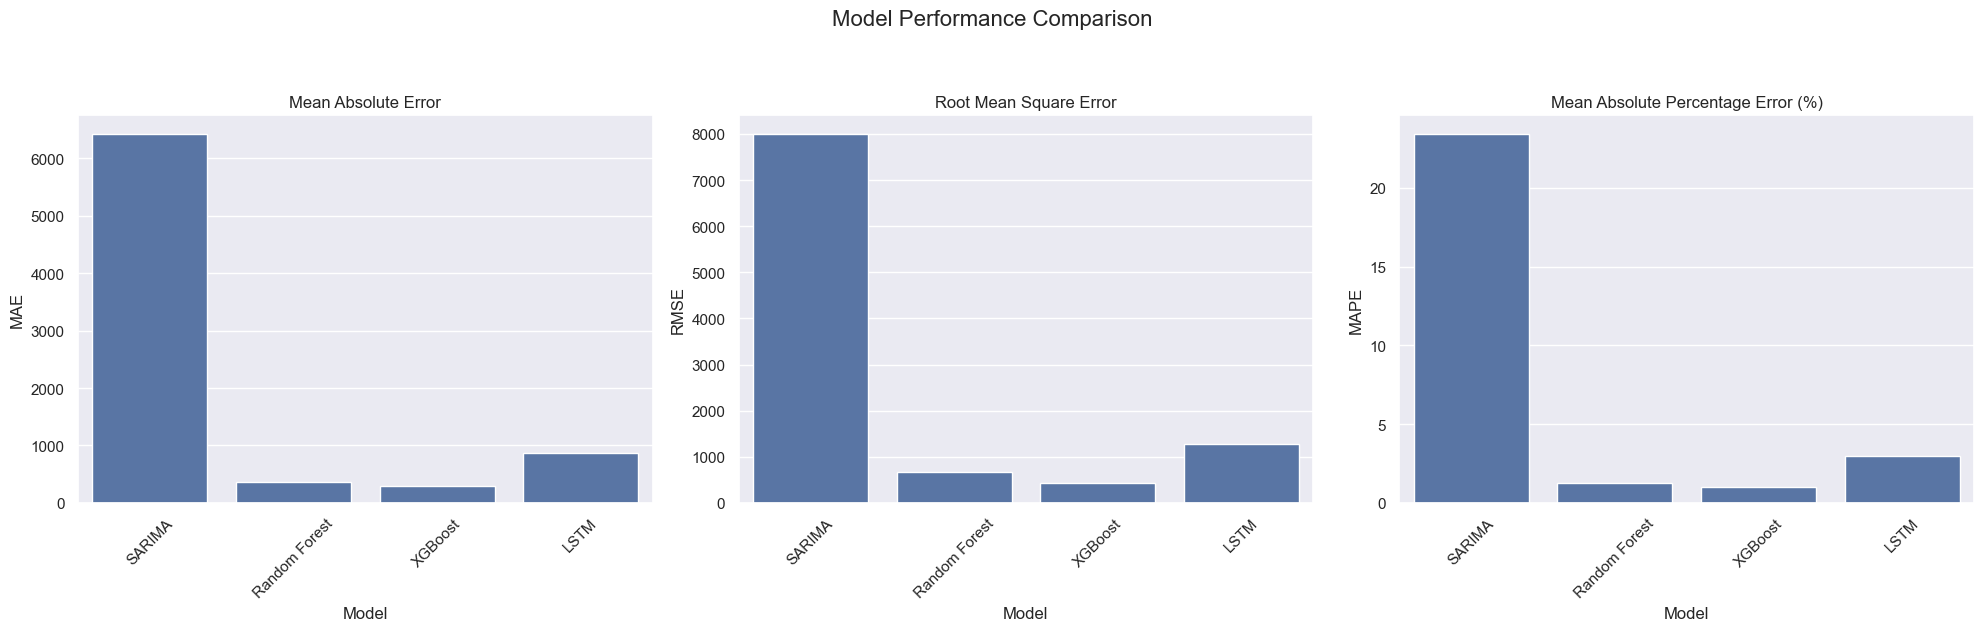


Detailed Model Comparison:
        Model         MAE        RMSE      MAPE
       SARIMA 6425.161255 8002.676225 23.415908
Random Forest  367.347297  675.550501  1.269260
      XGBoost  292.014870  431.497126  0.985098
         LSTM  872.864316 1273.435084  2.951009

Best Models by Metric:
MAE: XGBoost (292.01)
RMSE: XGBoost (431.50)
MAPE: XGBoost (0.99)

Analysis Summary:
1. Model Characteristics:
   - SARIMA: Statistical approach, captures temporal dependencies
   - Random Forest: Ensemble method, good at capturing non-linear relationships
   - XGBoost: Gradient boosting, typically best for structured data
   - LSTM: Deep learning approach, specialized for sequential data

2. Key Findings:
   - Best overall model:  XGBoost
   - Most consistent model:  XGBoost

3. Trade-offs:
   - SARIMA: Simple, interpretable, but less flexible
   - ML Models: More complex, better performance, require more data
   - LSTM: Best for capturing long-term dependencies, but most computationally intensive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set style for plots
sns.set_theme()
plt.rcParams['figure.figsize'] = [15, 6]

# Load all models and their metrics
print("Loading models and metrics...")

# Load SARIMA model
with open('../models/sarima_model.pkl', 'rb') as f:
    sarima_info = pickle.load(f)

# Load ML models metadata
ml_metadata = joblib.load('../models/model_metadata.joblib')

# Create comparison dataframe for 24h predictions
models_comparison = pd.DataFrame({
    'Model': ['SARIMA', 'Random Forest', 'XGBoost', 'LSTM'],
    'MAE': [
        sarima_info['metrics']['mae'],
        ml_metadata['24h']['random_forest']['metrics']['mae'],
        ml_metadata['24h']['xgboost']['metrics']['mae'],
        ml_metadata['24h']['lstm']['metrics']['mae']
    ],
    'RMSE': [
        sarima_info['metrics']['rmse'],
        ml_metadata['24h']['random_forest']['metrics']['rmse'],
        ml_metadata['24h']['xgboost']['metrics']['rmse'],
        ml_metadata['24h']['lstm']['metrics']['rmse']
    ],
    'MAPE': [
        sarima_info['metrics']['mape'],
        ml_metadata['24h']['random_forest']['metrics']['mape'],
        ml_metadata['24h']['xgboost']['metrics']['mape'],
        ml_metadata['24h']['lstm']['metrics']['mape']
    ]
})

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison', fontsize=16, y=1.05)

# MAE comparison
sns.barplot(x='Model', y='MAE', data=models_comparison, ax=axes[0])
axes[0].set_title('Mean Absolute Error')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
sns.barplot(x='Model', y='RMSE', data=models_comparison, ax=axes[1])
axes[1].set_title('Root Mean Square Error')
axes[1].tick_params(axis='x', rotation=45)

# MAPE comparison
sns.barplot(x='Model', y='MAPE', data=models_comparison, ax=axes[2])
axes[2].set_title('Mean Absolute Percentage Error (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Model Comparison:")
print(models_comparison.to_string(index=False))

# Find best model for each metric
print("\nBest Models by Metric:")
for metric in ['MAE', 'RMSE', 'MAPE']:
    best_idx = models_comparison[metric].idxmin()
    best_model = models_comparison.iloc[best_idx]
    print(f"{metric}: {best_model['Model']} ({best_model[metric]:.2f})")

# Print analysis summary
print("\nAnalysis Summary:")
print("1. Model Characteristics:")
print("   - SARIMA: Statistical approach, captures temporal dependencies")
print("   - Random Forest: Ensemble method, good at capturing non-linear relationships")
print("   - XGBoost: Gradient boosting, typically best for structured data")
print("   - LSTM: Deep learning approach, specialized for sequential data")

print("\n2. Key Findings:")
print("   - Best overall model: ", models_comparison.iloc[models_comparison['MAE'].idxmin()]['Model'])
print("   - Most consistent model: ", models_comparison.iloc[models_comparison['MAPE'].idxmin()]['Model'])

print("\n3. Trade-offs:")
print("   - SARIMA: Simple, interpretable, but less flexible")
print("   - ML Models: More complex, better performance, require more data")
print("   - LSTM: Best for capturing long-term dependencies, but most computationally intensive")

# Save comparison results
comparison_results = {
    'comparison_df': models_comparison,
    'best_model': models_comparison.iloc[models_comparison['MAE'].idxmin()]['Model'],
    'metrics_summary': {
        'best_mae': models_comparison['MAE'].min(),
        'best_rmse': models_comparison['RMSE'].min(),
        'best_mape': models_comparison['MAPE'].min()
    }
}

with open('../models/model_comparison_results.pkl', 'wb') as f:
    pickle.dump(comparison_results, f)

print("\nComparison results saved to '../models/model_comparison_results.pkl'")